<a href="https://colab.research.google.com/github/anapaaula/ensemble-doencas-cardiacas/blob/main/Classifica%C3%A7%C3%A3o_de_doen%C3%A7as_card%C3%ADacas_Ensembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de Doenças Cardíacas

Este projeto tem como objetivo a classificação de doenças cardíacas utilizando técnicas de aprendizado de máquina. O foco principal é prever a presença de doenças cardíacas com base em um conjunto de variáveis clínicas e atributos relacionados ao estado de saúde do paciente.


## Importando Bibliotecas

In [ ]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 10.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
import imblearn
from imblearn.pipeline import make_pipeline as make_imb_pipeline
from imblearn.over_sampling import SMOTE
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import shap

shap.initjs()

## Importanto os dados

Os dados estão disponíveis aqui: [link](https://drive.google.com/file/d/10Yq-33yf5kSLZpOO6BQvWZzDxddpF-Lr/view)

**Descrição das features:**

* **age:** Idade do paciente
* **sex:** Gênero do paciente (1 = male, 0 = female)
* **cp:** Tipo de dor no peito (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic)
* **trestbps:** pressão arterial em repouso (em mm/HG na admissão ao hospital)
* **chol:** Colesterol total em mg/dl
* **fbs:** Nível de açúcar no sangue > 120 mg/dl (1=true, 0=false)
* **restecg:** Resultado do exame eletrocardiograma em repouso (0= normal, 1 = anormalidade na onda ST-T, 2 =  possível espessamento das paredes do ventrículo esquerdo do coração)
* **thalach:** Frequência cardíaca máxima
* **exang:**  Angina induzida pelo exercício (0=false, 1=true)
* **oldpeak:** Queda do ST induzida pelo exercício
* **slope:** Segmento ST medido em termos de inclinação durante o pico do exercício (0= inclinação ascendente; 1 = plano; 2 = inclinação descendente)
* **ca:** número de vasos principais (0-3) coloridos por fluoroscopia.
* **thal:** Uma doença sanguínea chamada talassemia ( 0 = nulo, 1 = fluxo sanguíneo normal, 2 = dano fixo (sem fluxo sanguíneo em alguma parte do coração), 3 = dano reversível (um fluxo sanguíneo é observado, mas não é normal)
* **target:** É a variável alvo que devemos prever. (1 = presença de doença cardíaca, 0=paciente sem doença cardíaca)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/CDP/heart.csv'
df = pd.read_csv(file_path)

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Análise Exploratória dos Dados

### Estatísticas Descritivas

Verificando os tipos das variáveis presentes no dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Verificando a presença de valores nulos nas colunas do DataFrame.

In [ ]:
df.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


Verificando as estatísticas descritivas das colunas do DataFrame.

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Verificando as dimensões do DataFrame.

In [ ]:
df.shape

(1025, 14)

### Correlações das variáveis

Tabela de correlação das variáveis.

In [ ]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


Ao analisar as correlações entre a variável alvo (presença de doença cardíaca) e as demais variáveis, foram encontrados os seguintes padrões:

Correlação moderada e positiva com as variáveis cp (tipo de dor no peito), thalach (frequência cardíaca máxima) e slope (inclinação do segmento ST): Uma maior intensidade ou variedade de dor no peito e uma frequência cardíaca máxima mais alta estão associadas a uma maior probabilidade de presença de doença cardíaca. A inclinação do segmento ST durante o exercício também mostra uma correlação moderada, sugerindo que alterações na inclinação do segmento ST podem ser indicativas da presença da doença.

Correlação moderada e negativa com as variáveis oldpeak (queda do ST induzida pelo exercício), exang (angina induzida pelo exercício), ca (número de vasos principais coloridos por fluoroscopia) e thal (talassemia): Uma maior queda do ST durante o exercício e a ausência de angina induzida pelo exercício estão associadas a uma maior probabilidade de presença de doença cardíaca. Além disso, um menor número de vasos principais visíveis e a presença de dano fixo ou reversível no fluxo sanguíneo também indicam uma maior probabilidade de doença cardíaca.



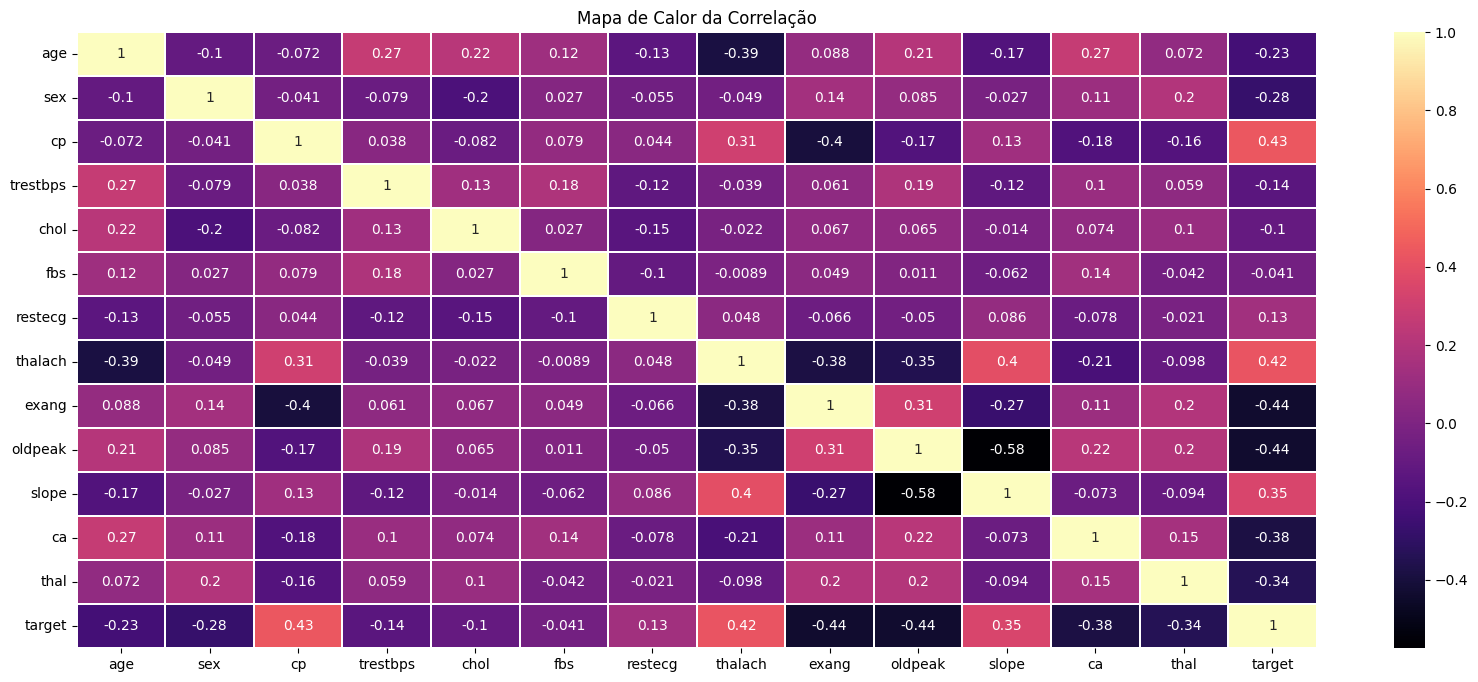

In [ ]:
f, ax = plt.subplots(figsize=(20,8))
ax.set_title('Mapa de Calor da Correlação')
ax = sns.heatmap(corr, cmap='magma', linewidths=.1, annot=True)

### Visualização da Distribuição das Variáveis

Distribuição da variável alvo.

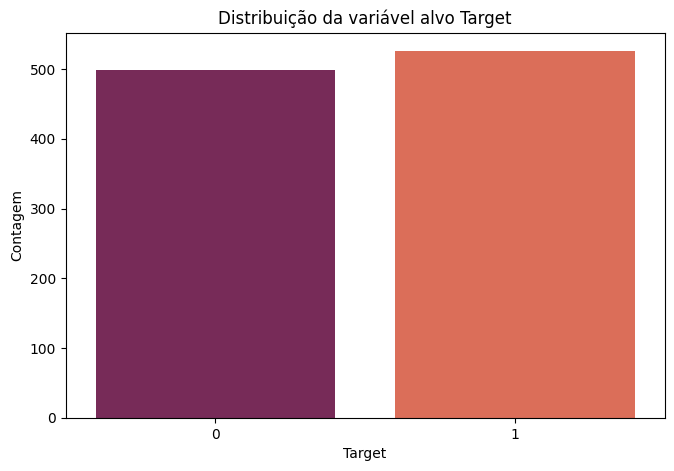

In [ ]:
fig = plt.figure(figsize=(17, 11))

ax = fig.add_subplot(221)
sns.countplot(data=df, x="target", hue="target", palette="rocket", ax=ax, legend=False)
ax.set_title('Distribuição da variável alvo Target')
ax.set_xlabel('Target')
ax.set_ylabel('Contagem')

plt.show()

O gráfico abaixo mostra a contagem de tipos de dor no peito em relação à variável alvo. Pode-se perceber que os pacientes que não apresentam a doença têm mais dores no peito do tipo Typical Angina, enquanto os pacientes que possuem a doença sentem mais dores dos tipos Atypical Angina e Non-anginal Pain.

<ipython-input-13-3c9300ead7e9>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], fontsize=12)


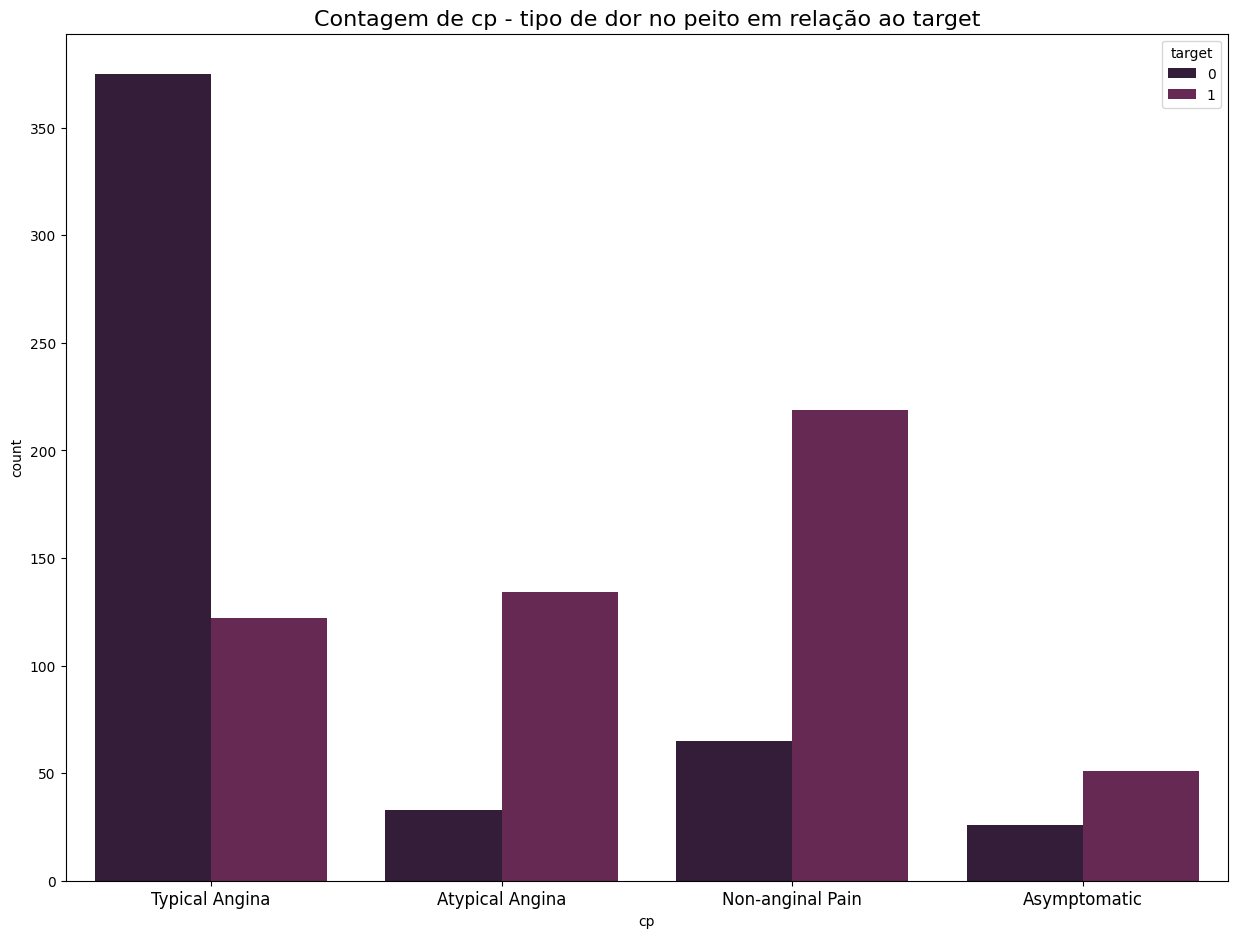

In [ ]:
fig= plt.figure(figsize=(15,11))
ax = sns.countplot(x='cp', hue='target', data=df, palette=sns.set_palette("rocket"))
ax.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'], fontsize=12)
ax.set_title('Contagem de cp - tipo de dor no peito em relação ao target', fontsize=16)
plt.show()

Pacientes com a frequência cardíaca máxima maior ou igual a 149 tendem a apresentar a doença cardíaca, enquanto os pacientes com a frequência cardíaca máxima menor que 149 tendem a não apresentar a doença cardíaca.

<ipython-input-14-2753deac1221>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['thalach'] > 149], x='target', palette="Blues", ax=ax1, order=[1, 0])
<ipython-input-14-2753deac1221>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['thalach'] <= 149], x='target', palette="Purples", ax=ax2, order=[1, 0])


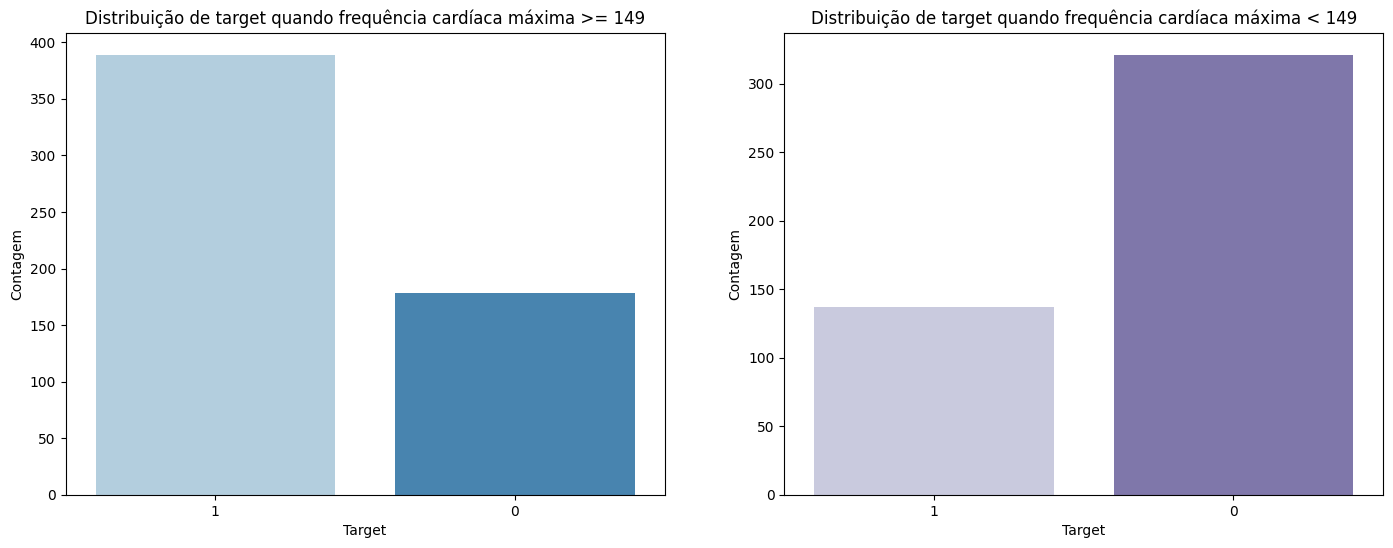

In [ ]:
fig = plt.figure(figsize=(17, 6))

ax1 = fig.add_subplot(121)
sns.countplot(data=df[df['thalach'] > 149], x='target', palette="Blues", ax=ax1, order=[1, 0])
ax1.set_title('Distribuição de target quando frequência cardíaca máxima >= 149')
ax1.set_xlabel('Target')
ax1.set_ylabel('Contagem')

ax2 = fig.add_subplot(122)
sns.countplot(data=df[df['thalach'] <= 149], x='target', palette="Purples", ax=ax2, order=[1, 0])
ax2.set_title('Distribuição de target quando frequência cardíaca máxima < 149')
ax2.set_xlabel('Target')
ax2.set_ylabel('Contagem')

plt.show()

Quando há ausência de angina induzida pelo exercício, a quantidade de pacientes com doença cardíaca é maior.

<ipython-input-15-10c141b1fe3f>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['False', 'True'], fontsize=12)


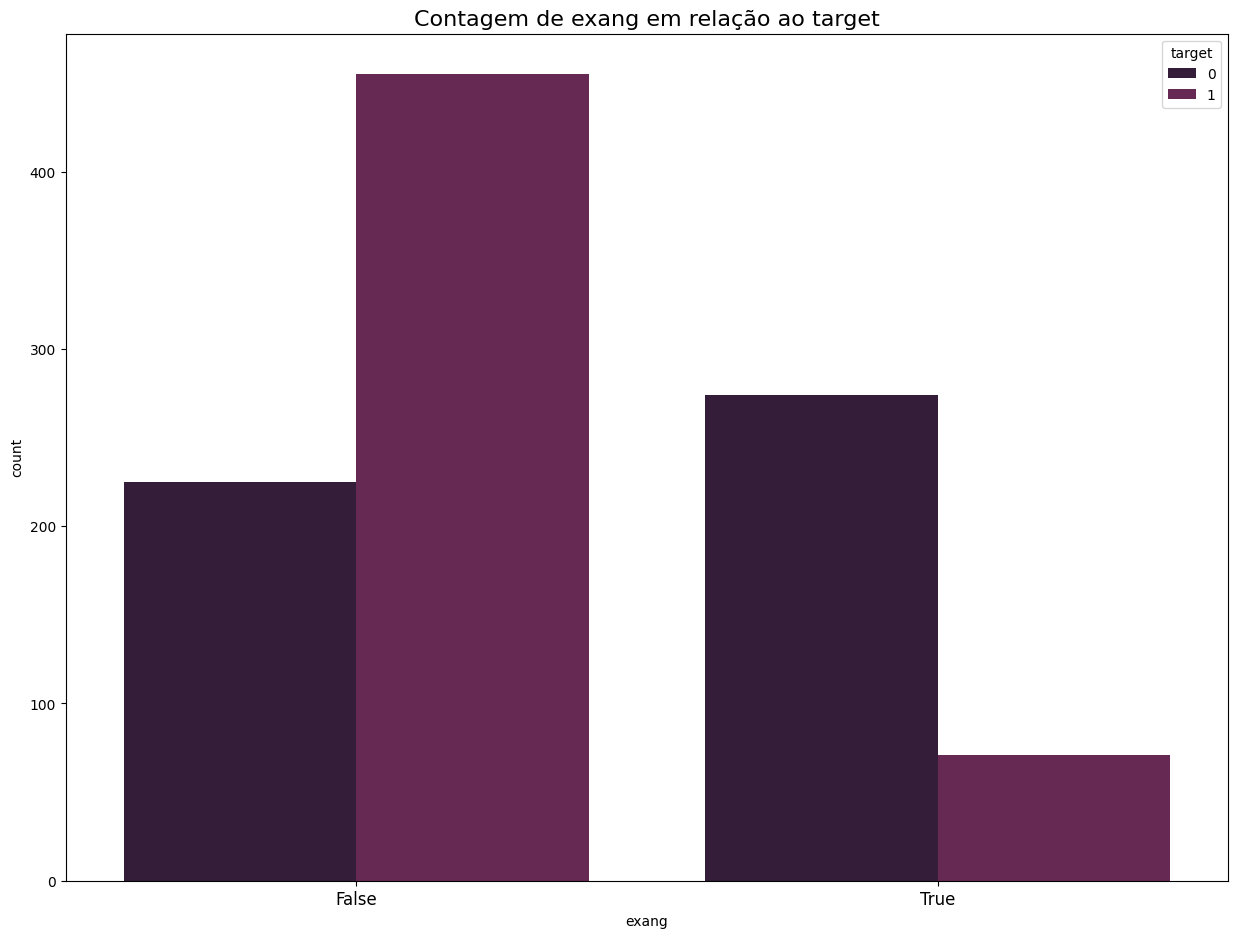

In [ ]:
fig= plt.figure(figsize=(15,11))
ax = sns.countplot(x='exang', hue='target', data=df, palette=sns.set_palette("rocket"))
ax.set_xticklabels(['False', 'True'], fontsize=12)
ax.set_title('Contagem de exang em relação ao target', fontsize=16)
plt.show()

Observa-se que, quando oldpeak é menor que 1, a quantidade de pacientes com doenças cardíacas é maior.

<ipython-input-16-c98a514f40ec>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['oldpeak'] >= 1], x='target', palette="Greens", ax=ax1)
<ipython-input-16-c98a514f40ec>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['oldpeak'] <= 1], x='target', palette="Oranges", ax=ax2)


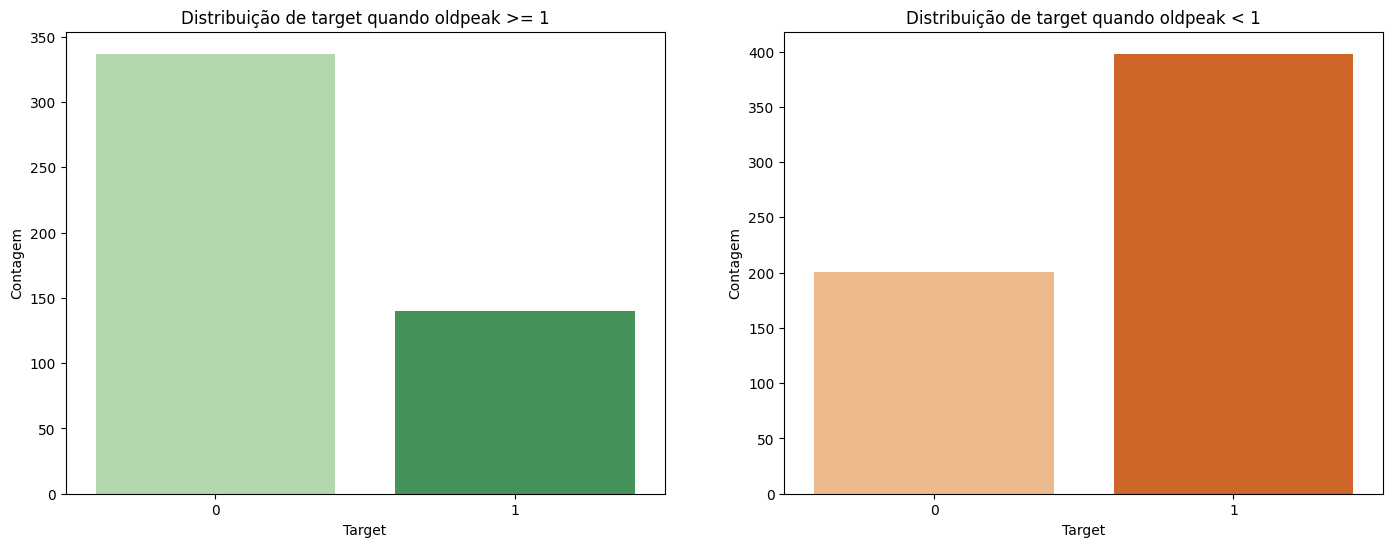

In [ ]:
fig = plt.figure(figsize=(17, 6))

ax1 = fig.add_subplot(121)
sns.countplot(data=df[df['oldpeak'] >= 1], x='target', palette="Greens", ax=ax1)
ax1.set_title('Distribuição de target quando oldpeak >= 1')
ax1.set_xlabel('Target')
ax1.set_ylabel('Contagem')

ax2 = fig.add_subplot(122)
sns.countplot(data=df[df['oldpeak'] <= 1], x='target', palette="Oranges", ax=ax2)
ax2.set_title('Distribuição de target quando oldpeak < 1')
ax2.set_xlabel('Target')
ax2.set_ylabel('Contagem')

plt.show()

Quando o slope possui uma inclinação descendente, há uma maior quantidade de pacientes com doença cardíaca. Por outro lado, quando o slope é plano, a quantidade de pacientes sem a doença é maior.


<ipython-input-17-d35a0d49b107>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Inclinação Ascendente', 'Plano', 'Inclinação Descendente'], fontsize=12)


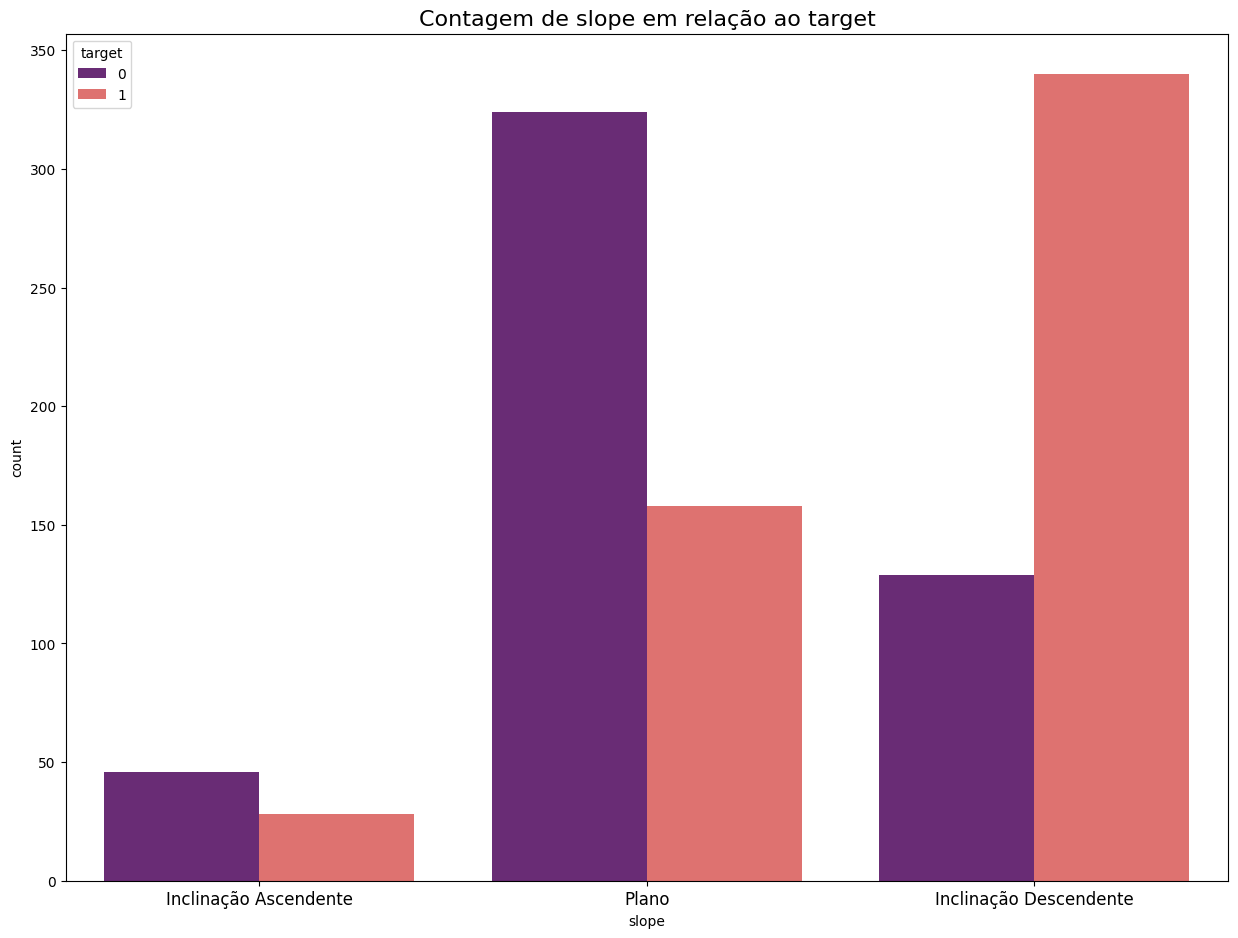

In [ ]:
fig= plt.figure(figsize=(15,11))
ax = sns.countplot(x='slope', hue='target', data=df, palette='magma')
ax.set_xticklabels(['Inclinação Ascendente', 'Plano', 'Inclinação Descendente'], fontsize=12)
ax.set_title('Contagem de slope em relação ao target', fontsize=16)
plt.show()

<ipython-input-18-2e63181d731d>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['0', '1', '2', '3', '4'], fontsize=12)


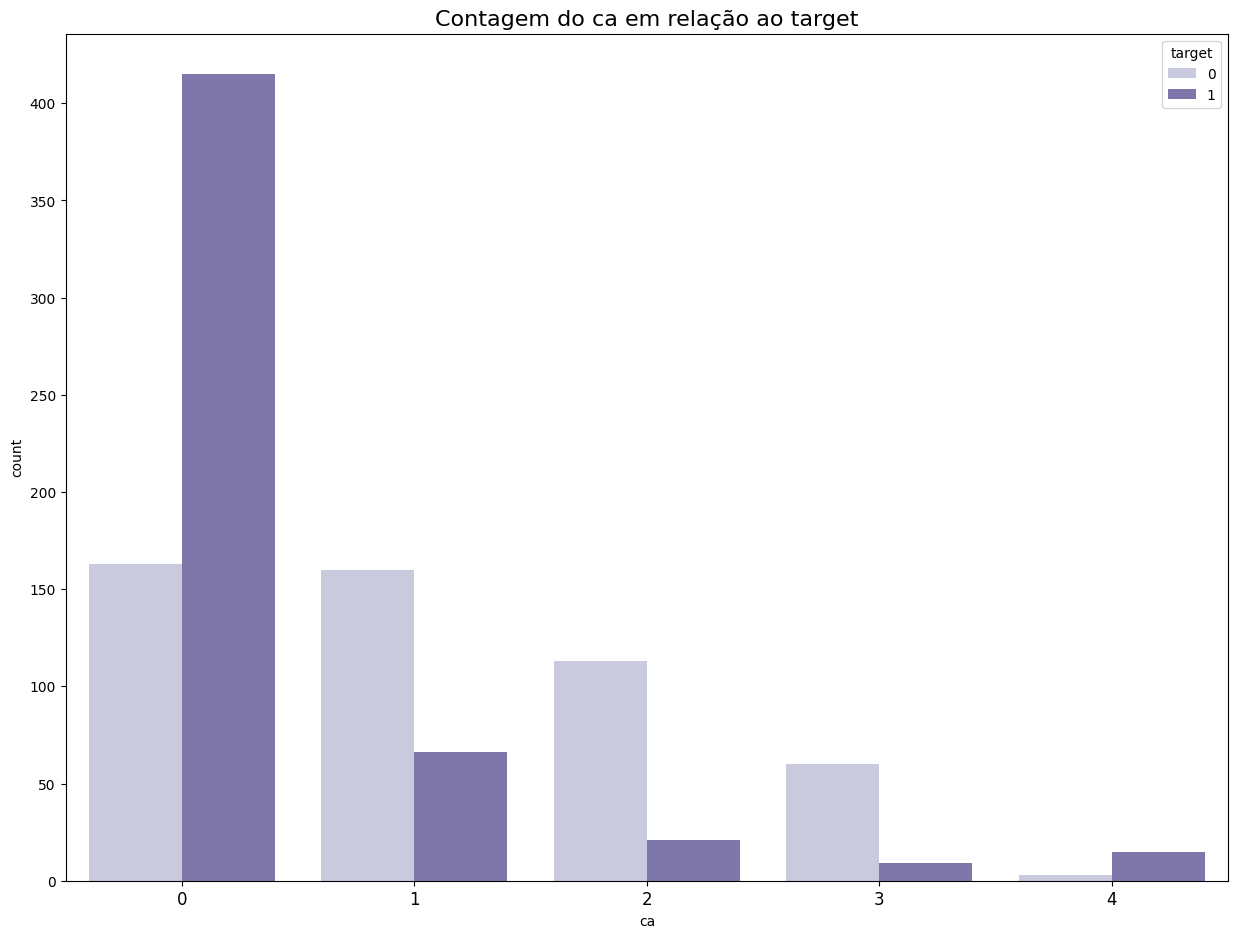

In [ ]:
fig= plt.figure(figsize=(15,11))
ax = sns.countplot(x='ca', hue='target', data=df, palette='Purples')
ax.set_xticklabels(['0', '1', '2', '3', '4'], fontsize=12)
ax.set_title('Contagem do ca em relação ao target', fontsize=16)
plt.show()

<ipython-input-19-5fcbe1cff9ea>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Nulo', 'Fluxo sanguíneo normal', 'Dano fixo', 'Dano reversível'], fontsize=12)


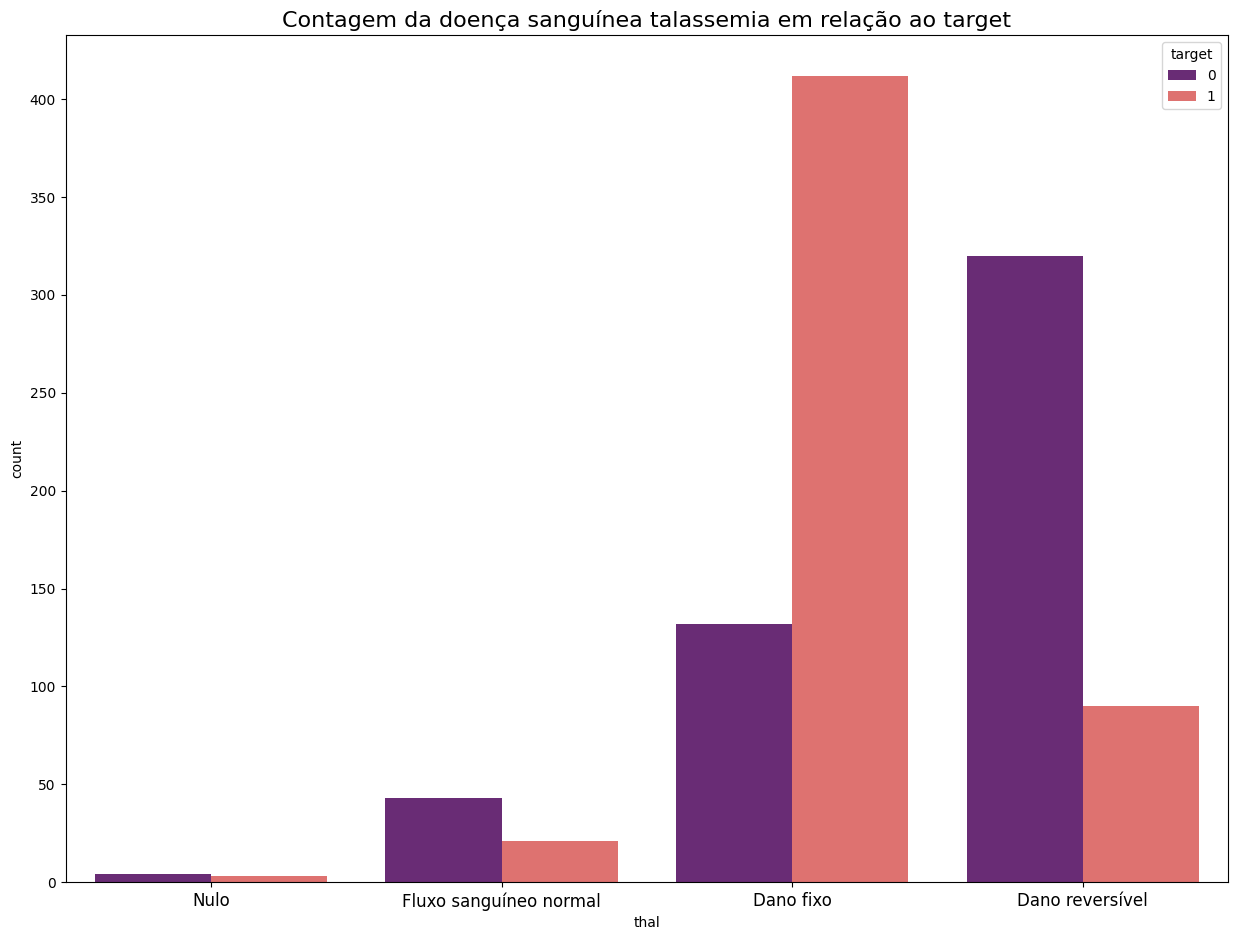

In [ ]:
fig= plt.figure(figsize=(15,11))
ax = sns.countplot(x='thal', hue='target', data=df, palette='magma')
ax.set_xticklabels(['Nulo', 'Fluxo sanguíneo normal', 'Dano fixo', 'Dano reversível'], fontsize=12)
ax.set_title('Contagem da doença sanguínea talassemia em relação ao target', fontsize=16)
plt.show()

## Balanceamento das classes

In [ ]:
x = df.drop(columns=["target"])
y = df["target"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
smote = SMOTE()

x_train_balanced, y_train_balanced = smote.fit_resample(x_train, y_train)

In [ ]:
print("Distribuição das classes após o smote:")
print(np.bincount(y_train_balanced))

Distribuição das classes após o smote:
[419 419]


## Modelos

Após treinar diversos modelos de machine learning para prever a presença de doenças cardíacas com base em atributos de saúde do paciente, incluindo Random Forest, ExtraTrees, AdaBoost, Gradient Boosting e Regressão Logística (utilizada como baseline), observou-se que os modelos ensemble apresentaram um desempenho significativamente superior. Eles alcançaram precisão e outras métricas de avaliação próximas de 100%. A Regressão Logística teve um desempenho ligeiramente inferior, mas ainda assim obteve resultados bastante satisfatórios, o que a torna uma alternativa viável.

Para otimizar o desempenho dos modelos, utilizei o GridSearchCV para encontrar os melhores hiperparâmetros, ajustando parâmetros como a taxa de aprendizado (learning rate), a profundidade máxima das árvores, entre outros, conforme o modelo específico. Além disso, também foi utilizado o SHAP para obter informações detalhadas sobre como cada característica (feature) contribui para as previsões dos modelos.

In [ ]:
def evaluation_model(y_test, model_predict):
  accuracy = accuracy_score(y_test, model_predict)
  precision = precision_score(y_test, model_predict)
  recall = recall_score(y_test, model_predict)
  f1 = f1_score(y_test, model_predict)

  evaluation = f"Accuracy: {accuracy}\nPrecision: {precision}\nRecall: {recall}\nF1 Score: {f1}"
  return evaluation


In [ ]:
features = x_train_balanced.columns.tolist()

### Random Forests

In [ ]:
rf = RandomForestClassifier()

hiperametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 5, 10],
}

rf_gridsearch = GridSearchCV(rf, hiperametros, cv=5, scoring='accuracy')
rf_gridsearch.fit(x_train_balanced, y_train_balanced)
rf_best = rf_gridsearch.best_estimator_
rf_predict = rf_best.predict(x_test)

print("Random Forest:")
print("Melhores hiperâmetros:", rf_gridsearch.best_params_)
print(evaluation_model(y_test,rf_predict))

Random Forest:
Melhores hiperâmetros: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Features importantes



In [ ]:
rf_best.feature_importances_

array([0.09377812, 0.03815489, 0.12697401, 0.07523278, 0.07992788,
       0.00934108, 0.01931298, 0.12531135, 0.05971222, 0.11083111,
       0.04752086, 0.10998625, 0.10391646])

Text(0.5, 1.0, 'Importância de cada feature no Random Forest')

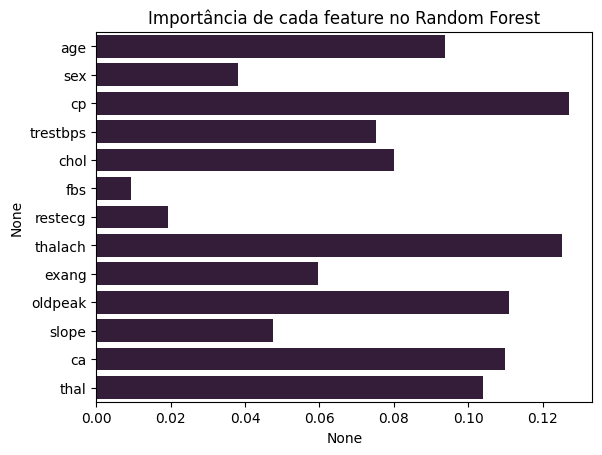

In [ ]:
importances = pd.Series(data=rf_best.feature_importances_, index=rf_best.feature_names_in_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature no Random Forest')

##### Shap

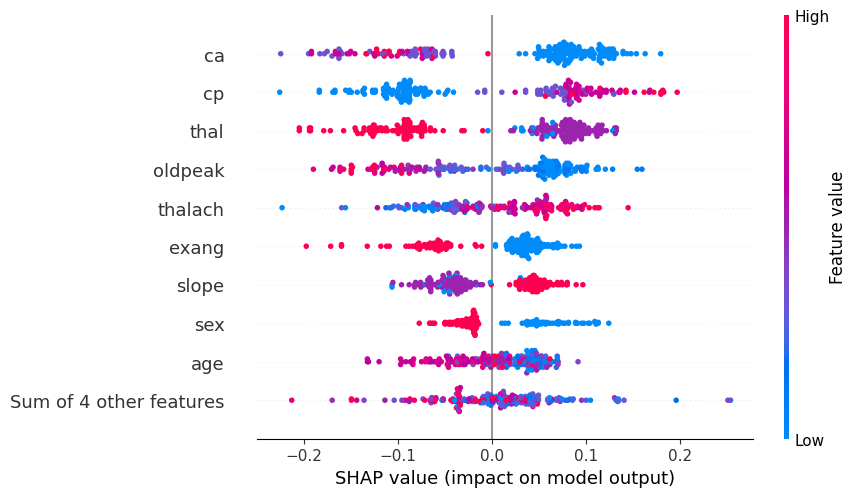

In [ ]:
explainer = shap.TreeExplainer(rf_best)
explanation = explainer(x_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation[:,:,1])

### ExtraTrees

In [ ]:
et = ExtraTreesClassifier()

hiperametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [1, 5, 10],
}

et_gridsearch = GridSearchCV(et, hiperametros, cv=5, scoring='accuracy')
et_gridsearch.fit(x_train_balanced, y_train_balanced)
et_best = et_gridsearch.best_estimator_
et_predict =  et_best.predict(x_test)

print("ExtraTrees:")
print("Melhores hiperâmetros:", et_gridsearch.best_params_)
print(evaluation_model(y_test,et_predict))

ExtraTrees:
Melhores hiperâmetros: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.9951219512195122
Precision: 0.9907407407407407
Recall: 1.0
F1 Score: 0.9953488372093023


#### Features importantes

In [ ]:
et_best.feature_importances_

array([0.06062208, 0.06779986, 0.14914725, 0.05228087, 0.0518195 ,
       0.02055498, 0.0386803 , 0.08262539, 0.0997771 , 0.08279036,
       0.06678935, 0.11736373, 0.10974924])

Text(0.5, 1.0, 'Importância de cada feature na ExtraTree')

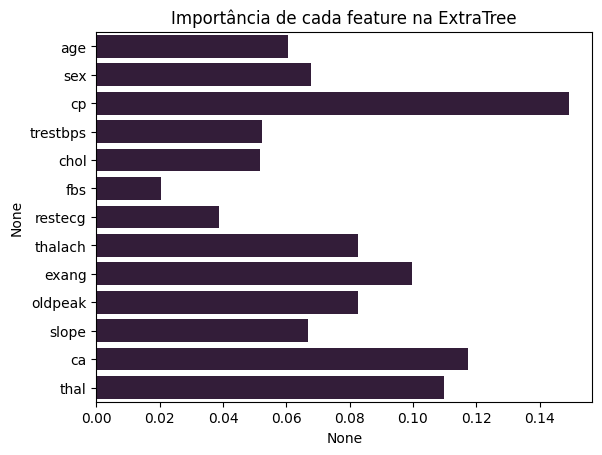

In [ ]:
importances = pd.Series(data=et_best.feature_importances_, index=et_best.feature_names_in_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature na ExtraTree')

##### Shap

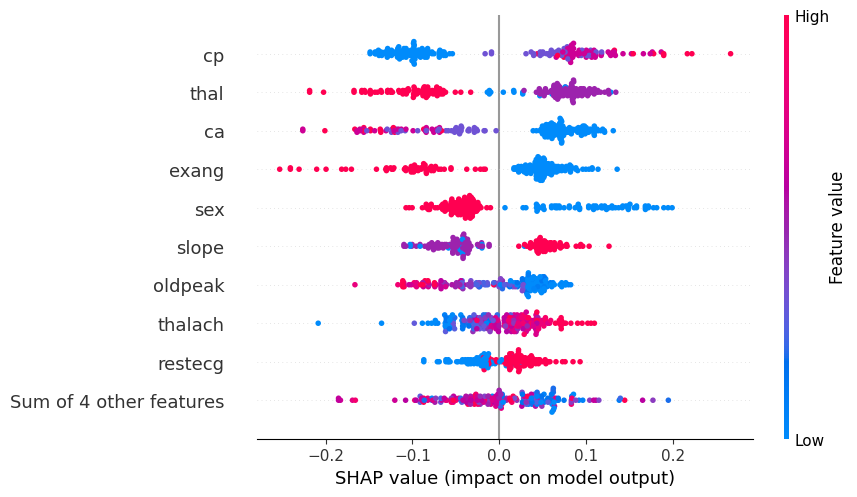

In [ ]:
explainer = shap.TreeExplainer(et_best)
explanation = explainer(x_test)

shap_values = explanation.values

shap.plots.beeswarm(explanation[:,:,1])

### Adaboost

In [ ]:
adaboost = AdaBoostClassifier()

hiperametros = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
}

adaboost_gridsearch = GridSearchCV(adaboost, hiperametros, cv=5, scoring='accuracy')
adaboost_gridsearch.fit(x_train_balanced, y_train_balanced)
adaboost_best = adaboost_gridsearch.best_estimator_
adaboost_predict = adaboost_best.predict(x_test)

print("AdaBoost:")
print("Melhores hiperâmetros:", adaboost_gridsearch.best_params_)
print(evaluation_model(y_test, adaboost_predict))

AdaBoost:
Melhores hiperâmetros: {'learning_rate': 1.0, 'n_estimators': 200}
Accuracy: 0.9512195121951219
Precision: 0.9217391304347826
Recall: 0.9906542056074766
F1 Score: 0.954954954954955


#### Features importantes

In [ ]:
adaboost_best.feature_importances_

array([0.185, 0.02 , 0.02 , 0.125, 0.265, 0.01 , 0.01 , 0.125, 0.01 ,
       0.1  , 0.025, 0.07 , 0.035])

Text(0.5, 1.0, 'Importância de cada feature no Adaboost')

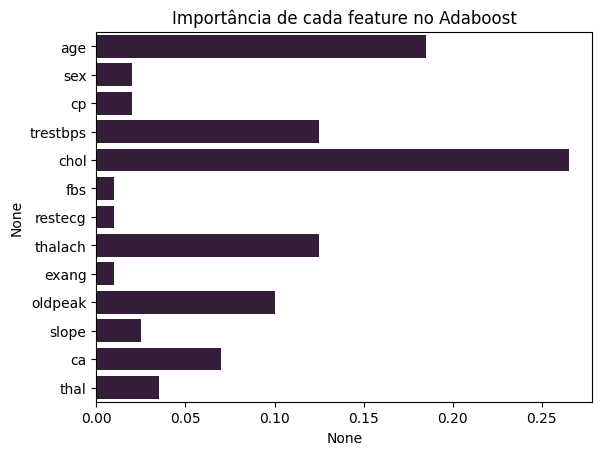

In [ ]:
importances = pd.Series(data=adaboost_best.feature_importances_, index=adaboost_best.feature_names_in_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature no Adaboost')

### Gradient Boosting

In [ ]:
gb = GradientBoostingClassifier()

hiperametros = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'max_depth': [1, 5, 10]
}

gb_gridsearch = GridSearchCV(gb, hiperametros, cv=5, scoring='accuracy')
gb_gridsearch.fit(x_train_balanced, y_train_balanced)
gb_best = gb_gridsearch.best_estimator_
gb_predict = gb_best.predict(x_test)

print("Gradient Boosting:")
print("Melhores hiperâmetros:", gb_gridsearch.best_params_)
print(evaluation_model(y_test, gb_predict))

Gradient Boosting:
Melhores hiperâmetros: {'learning_rate': 1.0, 'max_depth': 5, 'n_estimators': 200}
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


#### Features importantes

In [ ]:
gb_best.feature_importances_

array([0.05618911, 0.0550676 , 0.27437303, 0.06890268, 0.11072411,
       0.00678462, 0.00457828, 0.07134886, 0.01563887, 0.08578895,
       0.01174623, 0.11488761, 0.12397005])

Text(0.5, 1.0, 'Importância de cada feature no Gradient Boosting')

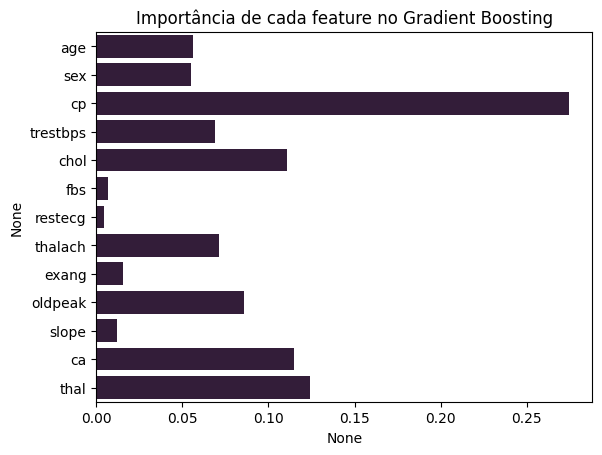

In [ ]:
importances = pd.Series(data=gb_best.feature_importances_, index=gb_best.feature_names_in_)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature no Gradient Boosting')

##### Shap

In [ ]:
explainer = shap.TreeExplainer(gb_best)

shap_values = explainer.shap_values(x_train_balanced)

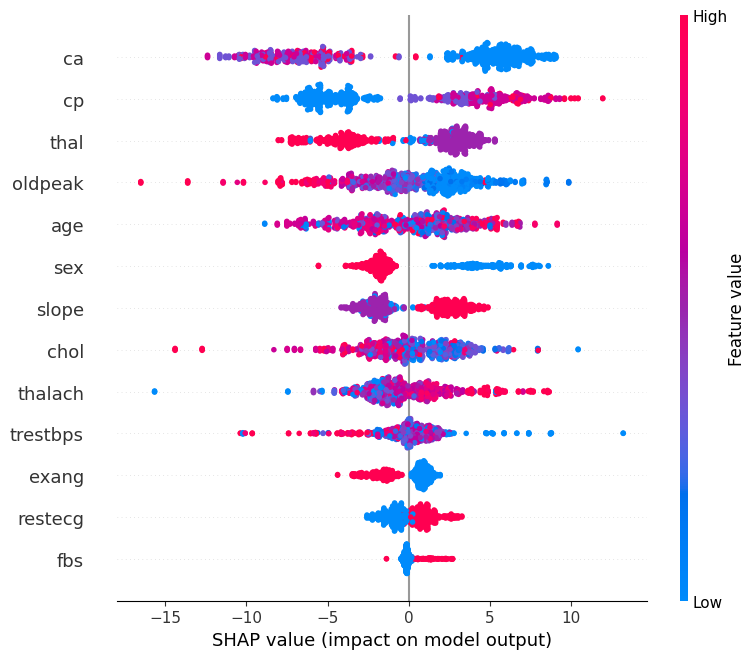

In [ ]:
shap.summary_plot(shap_values, features=x_train_balanced, feature_names=features)


### Regressão Logística

In [ ]:
lr = LogisticRegression(penalty='l1',solver='liblinear',max_iter=10000,random_state=42)

lr.fit(x_train_balanced, y_train_balanced)
lr_predict = lr.predict(x_test)

print("Regressão Logística:")
print(evaluation_model(y_test, lr_predict))

Regressão Logística:
Accuracy: 0.8536585365853658
Precision: 0.8235294117647058
Recall: 0.9158878504672897
F1 Score: 0.8672566371681415


#### Features importantes

In [ ]:
coefficients = lr.coef_[0]
feature_names = x_train_balanced.columns

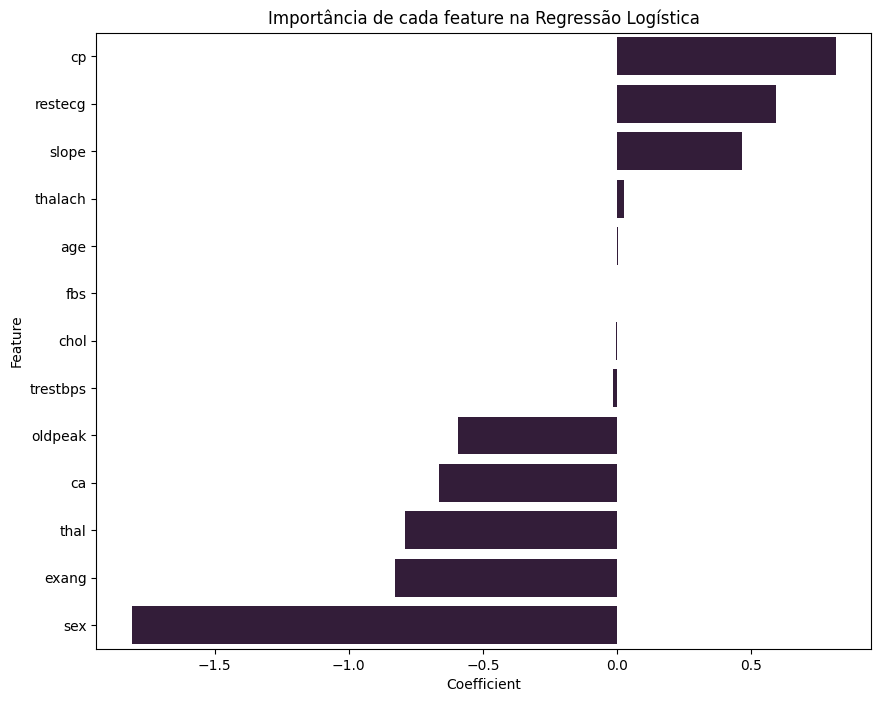

In [ ]:
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
coef_df = coef_df.sort_values(by='Coefficient', ascending=False)


plt.figure(figsize=(10, 8))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, orient='h')
plt.title('Importância de cada feature na Regressão Logística')
plt.show()